In [1]:
%pylab inline
import warnings
from itertools import product
from qiskit import *
warnings.filterwarnings('ignore')
matplotlib.rc('font', size=14)

Populating the interactive namespace from numpy and matplotlib


In [2]:
backend = BasicAer.get_backend('dm_simulator')
# Noise parameters
options = {}
options_noisy = {
    "thermal_factor": 0.,
    "decoherence_factor": 0.9,
    "depolarization_factor": 0.9,
    "bell_depolarization_factor": 0.99,
    "decay_factor": 0.8,
    "rotation_error": {'rx':[.5, 0.5], 'ry':[.5, 0.5], 'rz': [.9, 0.5]},
    "tsp_model_error": [0.5, 0.5]
    }

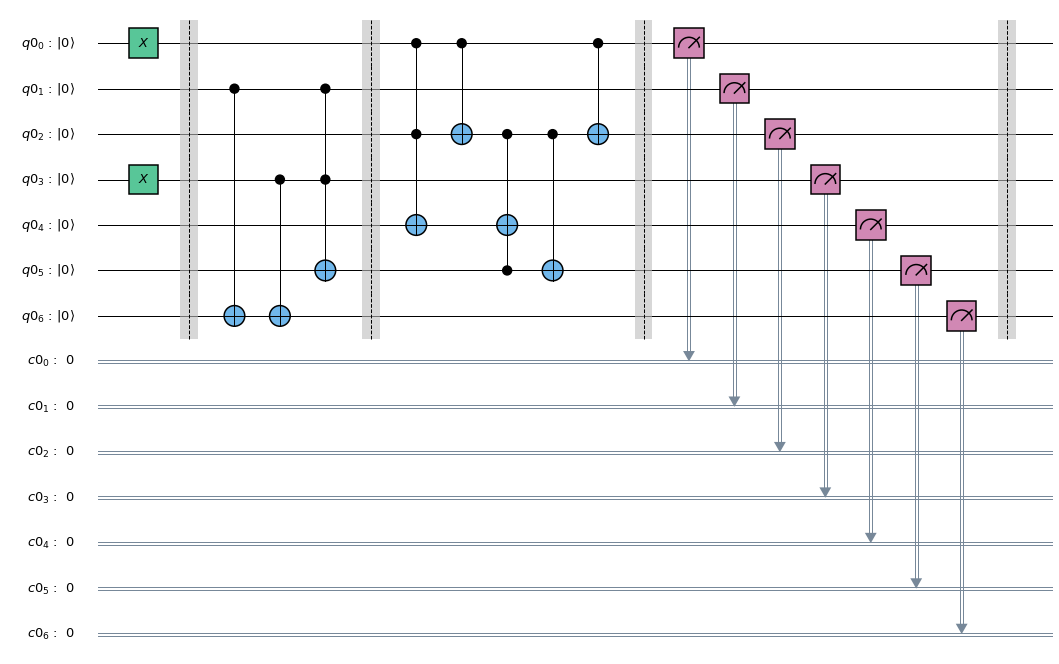

In [3]:
# The Circuit
q= QuantumRegister(7)
c = ClassicalRegister(7)
qc = QuantumCircuit(q,c)
# Preparation
qc.x(0)
qc.x(3)
qc.barrier()
# Addition
qc.cx(1,6)
qc.cx(3,6)
qc.ccx(1,3,5)
qc.barrier()
qc.ccx(0,2,4)
qc.cx(0,2)
qc.ccx(2,5,4)
qc.cx(2,5)
qc.cx(0,2)
qc.measure(q,c,basis='Ensemble',add_param='Z')
# Execution with and without noise
run = execute(qc,backend,**options)
result = run.result()
run_error = execute(qc,backend,**options_noisy)
result_error = run_error.result()
# Final state (probabilities)
prob = result['results'][0]['data']['ensemble_probability']
prob_error = result_error['results'][0]['data']['ensemble_probability']
qc.draw(output='mpl')

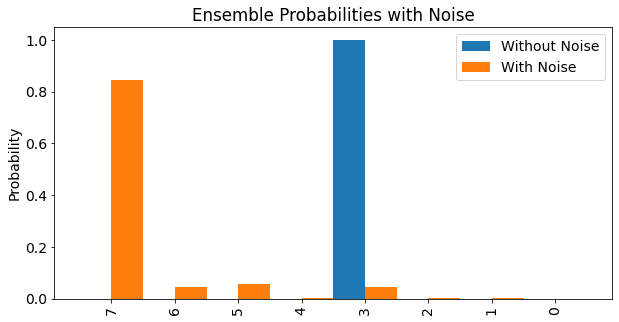

In [4]:
outputs = {
    int(result, 2) : sum([prob[binval] 
                          for binval in [bstr+result 
                                         for bstr in  [''.join(p) for p in product('10', repeat=4)]]]) 
    for result in  [''.join(p) for p in product('10', repeat=3)]}
outputs_error = {
    int(result, 2) : sum([prob_error[binval] 
                          for binval in [bstr+result
                                         for bstr in  [''.join(p) for p in product('10', repeat=4)]]]) 
    for result in  [''.join(p) for p in product('10', repeat=3)]
}
labels = outputs.keys()
without_noise = outputs.values()
with_noise = outputs_error.values()

x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, without_noise, width, label='Without Noise')
rects2 = ax.bar(x + width/2, with_noise, width, label='With Noise')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Probability')
ax.set_title('Ensemble Probabilities with Noise')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend()
plt.show()